In [1]:
import numpy as np
import pandas as pd
import keras
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import models, layers, Input, regularizers, losses, metrics, optimizers
from tensorflow.keras.models import Sequential, Model, load_model
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import linear_model

Using TensorFlow backend.


In [2]:
data = pd.read_csv("data.csv") # Importing the data

In [3]:
data.drop(data[data.year <1980].index, inplace = True) # Dropping classic cars
data.drop(data[data.con_int == 1].index, inplace = True) # Dropping cars that are being sold as scrap
data.drop(data[data.con_int == 6].index, inplace = True) # Dropping new cars
data.drop(data[data.price < 1000].index, inplace = True) # Dropping cars with super low prices, most likely erroneous
data.drop(data[data.price > 75000].index, inplace = True) # Cutting off expensive cars

In [4]:
data['price'].describe()

count    364231.000000
mean      15191.294722
std       12187.829071
min        1000.000000
25%        6000.000000
50%       11977.000000
75%       19997.000000
max       75000.000000
Name: price, dtype: float64

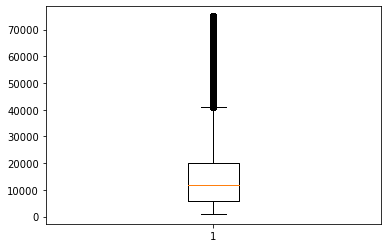

In [5]:
plt.boxplot(data['price'])
plt.show()

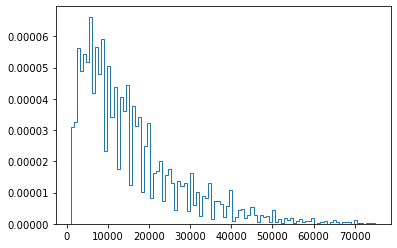

In [6]:
plt.hist(data.price, histtype='step', density=True, bins=100)
plt.show()

In [7]:
# data.drop(data[data.price < 6000].index, inplace = True) # Dropping cars with super low prices, most likely erroneous
# data.drop(data[data.price > 40000].index, inplace = True) # Cutting off expensive cars

In [8]:
data = data.drop(columns=['Unnamed: 0', 'region', 'manufacturer', 'model', 'condition', 'transmission', 'model_int'])

In [9]:
data.head()

,price,year,odometer,trans_type,make_type,con_int,region_income
0,6995,2000.0,167783.0,1,1,4,60316
1,8750,2013.0,90821.0,1,2,4,60316
2,10900,2013.0,92800.0,1,3,3,37508
3,12500,2003.0,NaN,0,4,3,47413
4,16995,2007.0,254217.0,1,1,3,60316


In [15]:
#replacing missing mileage values w average 
miles_avg = np.mean(data["odometer"])
data['odometer'] = data['odometer'].fillna(miles_avg)

In [16]:
#replace missing year w avg year
year_avg = np.mean(data["year"])
data['year'] = data['year'].fillna(year_avg)

In [17]:
y = data['price']
x = data.drop(columns=['price'])

x = x.to_numpy()
y = y.to_numpy()

In [18]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [19]:
x_train, x_val, og_y_train, og_y_val = train_test_split(x, y, test_size=0.2, random_state=2, shuffle=True)

In [35]:
scaler2 = StandardScaler()
y_train = scaler2.fit_transform(np.reshape(og_y_train,(len(og_y_train),1)))
y_val = scaler2.transform(np.reshape(og_y_val,(len(og_y_val),1)))

In [36]:
model = keras.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(6,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation = None))
model.compile(loss='mae', optimizer=keras.optimizers.adam())

In [37]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=10)

Train on 291384 samples, validate on 72847 samples
Epoch 1/10
291384/291384 [==============================] - 4s 14us/step - loss: 0.5618 - val_loss: 0.5478
Epoch 2/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5477 - val_loss: 0.5431
Epoch 3/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5434 - val_loss: 0.5393
Epoch 4/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5399 - val_loss: 0.5354
Epoch 5/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5371 - val_loss: 0.5336
Epoch 6/10
291384/291384 [==============================] - 4s 14us/step - loss: 0.5350 - val_loss: 0.5309
Epoch 7/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5332 - val_loss: 0.5305
Epoch 8/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5320 - val_loss: 0.5290
Epoch 9/10
291384/291384 [==============================] - 4s 13us/step - loss: 0.5312 - val

In [38]:
y_pred = model.predict(x_val)

In [39]:
y_pred = scaler2.inverse_transform(y_pred)

In [40]:
sklearn.metrics.mean_absolute_error(og_y_val, y_pred)

6439.572284937537

In [41]:
sklearn.metrics.median_absolute_error(og_y_val, y_pred)

4134.904296875

In [141]:
og = np.reshape(og_y_val, len(og_y_val))
scaled = np.reshape(y_pred, len(y_pred))
guy = np.abs(og - scaled)

In [142]:
np.mean(guy)

6725.555474119854

In [143]:
np.median(guy)

4166.60302734375

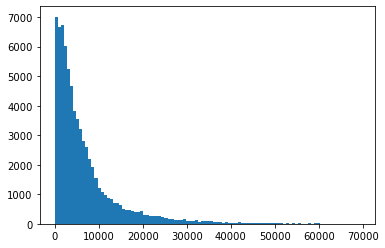

In [159]:
plt.hist(guy, bins=100)
plt.show()

In [145]:
sklearn.metrics.mean_squared_error(og_y_val, y_pred, squared=False)

10292.9980558668

In [146]:
# Baseline will be a multiple linear regression model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

pred = reg.predict(x_val)
pred = scaler2.inverse_transform(pred)
sklearn.metrics.mean_squared_error(pred, og_y_val, squared=False)

10635.57224817926

In [147]:
sklearn.metrics.mean_absolute_error(pred,og_y_val)

7878.157343248692

In [148]:
sklearn.metrics.median_absolute_error(pred,og_y_val)

6354.1526579392375

In [150]:
og = np.reshape(og_y_val, (72847))
scaled = np.reshape(pred, len(y_pred))
guy1 = np.abs(og - scaled)

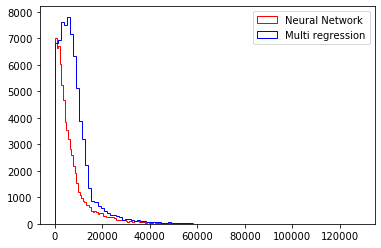

In [158]:
plt.hist(guy, bins=100, color='red', histtype='step', label='Neural Network')
plt.hist(guy1, bins=100, color='blue', histtype='step', label = "Multi regression")
plt.legend()
plt.show()

In [137]:
np.median(guy)

6354.1526579392375

In [138]:
np.mean(guy)

7878.157343248692

In [ ]:
# Looking up prices with examples on carfax and seeing how our neural network stacsk up
ex = np.array([[2018, 93923, 6, 1, 4, 54840], [2018, 55043,1, 5,5, 54840], [2016,86692,1,12,3,44077], [2013, 117702, 0, 3, 3, 63401], [2006, 147994, 0, 26, 2, 68377]])
ex = scaler.fit_transform(ex)
expred = model.predict(ex)
print(scaler2.inverse_transform(expred))